   Date  Temperature  Anomaly
0    18         34.2     -3.2
1    18         34.7     -2.7
2    18         35.5     -1.9
Coefficient: 1.5775539568345318
Intercept: 7.443525179856131
Predicted Temperatures: [35.8394964  37.41705036 38.99460432]
Predicted Temperature in 2019: 3192.52
Predicted Temperature in 1890: 2989.02
Predicted Temperature in 2024: 3200.41


c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


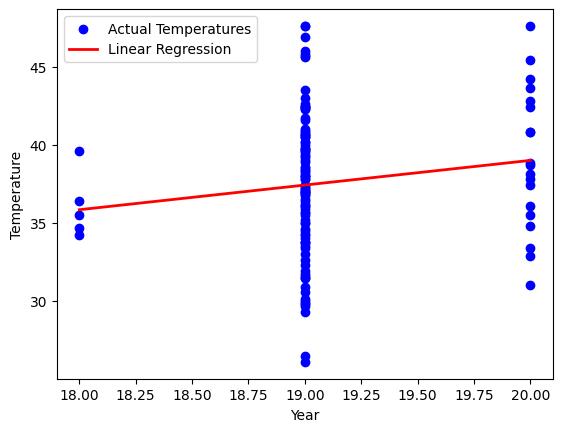

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Read the data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc['Date'] = nyc['Date'] // 100  # Using floor division instead of floordiv

# Display the first 3 rows of the data
print(nyc.head(3))

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(nyc[['Date']], nyc['Temperature'])

# Display the coefficients and intercept
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Make predictions on a range of years using np.arange
x_range = np.arange(min(nyc['Date']), max(nyc['Date']) + 1).reshape(-1, 1)
y_pred_range = model.predict(x_range)

# Display the predicted values
print("Predicted Temperatures:", y_pred_range)

# Predict temperatures for specific years
def predict_temperature(year):
    return model.coef_[0] * year + model.intercept_

# Round predicted temperatures to two decimal places
predicted_2019 = predict_temperature(2019)
predicted_1890 = predict_temperature(1890)
predicted_2024 = predict_temperature(2024)

predicted_2019_rounded = round(predicted_2019, 2)
predicted_1890_rounded = round(predicted_1890, 2)
predicted_2024_rounded = round(predicted_2024, 2)

# Display predictions for specific years with specified formatting
print(f"Predicted Temperature in 2019: {predicted_2019_rounded:.2f}")
print(f"Predicted Temperature in 1890: {predicted_1890_rounded:.2f}")
print(f"Predicted Temperature in 2024: {predicted_2024_rounded:.2f}")

# Show the scatterplot and the regression line
plt.scatter(nyc['Date'], nyc['Temperature'], color='blue', label='Actual Temperatures')
plt.plot(x_range, y_pred_range, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()
